### Import all neccessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame

### Plotting using Tract codes / GEOID

In [2]:
# Scraping of zip codes in the state of Washington
df = pd.read_html('https://www.zipcodestogo.com/Washington/') 

In [3]:
# Cleaning table
df1 = df[1].drop(0)
df1.columns = df1.iloc[0]
df2 = df1.drop([1])
df3 = df2.groupby(['Zip Code'])['City','Zip Code'].head()
df3

1,City,Zip Code
2,Auburn,98001
3,Auburn,98002
4,Federal Way,98003
5,Bellevue,98004
6,Bellevue,98005
...,...,...
729,Wallula,99363
730,Washtucna,99371
731,Anatone,99401
732,Asotin,99402


In [4]:
# Selecting only counties that are in the region of South Seattle
Auburn = df3.loc[df3['City'] == 'Auburn']

In [5]:
Federal_Way = df3.loc[df3['City'] == 'Federal Way']

In [6]:
Enumclaw = df3.loc[df3['City'] == 'Enumclaw']

In [7]:
Kent = df3.loc[df3['City'] == 'Kent']

In [8]:
Maple_Valley = df3.loc[df3['City'] == 'Maple Valley']

In [9]:
Renton = df3.loc[df3['City'] == 'Renton']

In [10]:
Vashon = df3.loc[df3['City'] == 'Vashon']

In [11]:
# Creating list of zip codes corresponding to counties in the South
df4 = pd.concat([Auburn, Federal_Way, Enumclaw, Kent, Maple_Valley, Renton, Vashon])

zip_list = list(df4.loc[:, 'Zip Code'])
zip_list

['98001',
 '98002',
 '98071',
 '98092',
 '98003',
 '98023',
 '98063',
 '98093',
 '98022',
 '98030',
 '98031',
 '98032',
 '98035',
 '98042',
 '98064',
 '98089',
 '98038',
 '98055',
 '98056',
 '98057',
 '98058',
 '98059',
 '98070']

In [12]:
# We import the tract shape file which we will use to map the South as an area of the whole of King County
# The file is a breakdown of Washington State by county and by GEOID/tract (area of land) 
usa = gpd.read_file('/Users/marwankalo/Documents/Data_Science/Project_Mod_1/opportunity_youth/data/processed/tl_2017_53_tract.shp')
usa.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,53,011,041107,53011041107,411.07,Census Tract 411.07,G5020,S,2031927,0,+45.6714148,-122.5911988,"POLYGON ((-122.59940 45.67149, -122.59939 45.6..."
1,53,061,042006,53061042006,420.06,Census Tract 420.06,G5020,S,2671334,0,+47.8941034,-122.2989299,"POLYGON ((-122.31235 47.89200, -122.31234 47.8..."
2,53,061,050102,53061050102,501.02,Census Tract 501.02,G5020,S,1805959,0,+47.8581251,-122.2955890,"POLYGON ((-122.30367 47.85577, -122.30367 47.8..."
3,53,053,073122,53053073122,731.22,Census Tract 731.22,G5020,S,5032200,0,+47.1057867,-122.2741688,"POLYGON ((-122.29350 47.09960, -122.29350 47.1..."
4,53,061,050600,53061050600,506,Census Tract 506,G5020,S,3209644,977407,+47.7881057,-122.3881006,"POLYGON ((-122.40094 47.78211, -122.40062 47.7..."


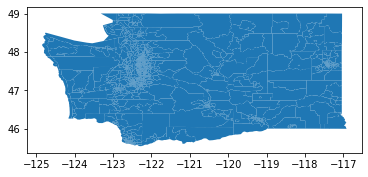

In [13]:
# A plot of the King County with tract borders
usa.plot()
plt.show()

In [14]:
# Converting the GEOID column to an integer, we will use this column later to match GEOID/tract codes
usa['GEOID'] = usa['GEOID'].apply(lambda x: int(x))
type(usa['GEOID'][0])

numpy.int64

In [15]:
# We now import the South King County data from our wider dataset, queried by the Southern zip codes we found above.
# We then identified all unique tract codes in Southern King County
sql_df = pd.read_csv('/Users/marwankalo/Documents/Data_Science/Project_Mod_1/opportunity_youth/data/processed/better variable trct south king query result.csv')
unique = sql_df['trct'].unique()
list_unique = unique.tolist()
list_unique

[53033024702,
 53033025001,
 53033025005,
 53033025006,
 53033025101,
 53033025102,
 53033025200,
 53033025301,
 53033025302,
 53033025400,
 53033025500,
 53033025601,
 53033025602,
 53033025701,
 53033025702,
 53033025803,
 53033025804,
 53033025805,
 53033025806,
 53033026002,
 53033026100,
 53033026200,
 53033027701,
 53033027702,
 53033028300,
 53033029004,
 53033029101,
 53033029102,
 53033029203,
 53033029204,
 53033029205,
 53033029206,
 53033029303,
 53033029304,
 53033029305,
 53033029306,
 53033029307,
 53033029403,
 53033029405,
 53033029406,
 53033029407,
 53033029408,
 53033029502,
 53033029503,
 53033029504,
 53033029601,
 53033029602,
 53033029700,
 53033029801,
 53033029802,
 53033029901,
 53033029902,
 53033030003,
 53033030004,
 53033030005,
 53033030006,
 53033030100,
 53033030201,
 53033030202,
 53033030304,
 53033030305,
 53033030306,
 53033030308,
 53033030309,
 53033030310,
 53033030311,
 53033030312,
 53033030313,
 53033030314,
 53033030401,
 53033030403,
 53033

In [16]:
# We create a new table of the shape file with only King County data
usa_king = usa.loc[usa['COUNTYFP'] == '033']
usa_king

# We create a new binary column that is True for King County GEOIDs or Tracts that match with those in the South
usa_king['is_south'] = usa_king['GEOID'].isin(list_unique).astype(int)
usa_king.head()

/Users/marwankalo/opt/anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,is_south
66,53,033,003800,53033003800,38,Census Tract 38,G5020,S,624606,0,+47.6794093,-122.2955292,"POLYGON ((-122.30076 47.68305, -122.29969 47.6...",0
67,53,033,021500,53033021500,215,Census Tract 215,G5020,S,3473757,439730,+47.7643848,-122.2737863,"POLYGON ((-122.29032 47.77595, -122.29031 47.7...",0
68,53,033,032704,53033032704,327.04,Census Tract 327.04,G5020,S,17087220,547457,+47.4940740,-121.7716740,"POLYGON ((-121.81220 47.49755, -121.81208 47.4...",0
69,53,033,026200,53033026200,262,Census Tract 262,G5020,S,15261730,507783,+47.4591441,-122.2435898,"POLYGON ((-122.27168 47.48031, -122.27166 47.4...",1
70,53,033,032703,53033032703,327.03,Census Tract 327.03,G5020,S,10276658,181210,+47.5144259,-121.8179472,"POLYGON ((-121.85930 47.51427, -121.85928 47.5...",0


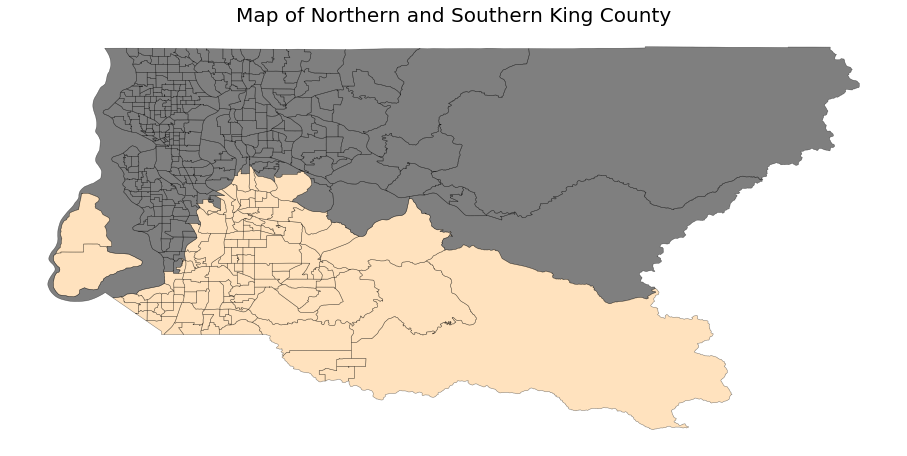

In [17]:
# We plot the tract area of Northern and Southern King County setting the column argument to the binary 'is_south'
# column to colour the different areas!
fig, ax = plt.subplots(1, figsize=(16,14))
ax = usa_king.plot(ax=ax, column='is_south', cmap='copper', alpha = .5, linewidth=.5, edgecolor='black')
ax.set_title('Map of Northern and Southern King County', size=20)
ax.set_axis_off()
plt.show()

### Plotting using PUMA ID

In [18]:
# I repeat the above steps however plot the map using PUMA ID instead of Tract/GEOID
wa_puma = gpd.read_file("../../data/raw/tl_2017_53_puma10.shp") 
wa_puma.loc[:,'PUMACE10'] = wa_puma['PUMACE10'].astype(int)
wa_puma.loc[:,'GEOID10'] = wa_puma['GEOID10'].astype(int)

In [19]:
# Isolate the King County Puma IDs
kc_puma = wa_puma.loc[(wa_puma.PUMACE10 >= 11601 ) & (wa_puma.PUMACE10 <= 11616)]
kc_puma.head()

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2..."
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5..."
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4..."
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5..."
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6..."


In [20]:
# Here we import the same South King County queried data
trct_df = pd.read_csv('/Users/marwankalo/Documents/Data_Science/Project_Mod_1/opportunity_youth/data/processed/better variable trct south king query result.csv')
trct_df.sample(5)

,trct
80,53033030902
74,53033030504
54,53033030005
69,53033030401
58,53033030202


In [21]:
# To find the Southern PUMA IDs we need to extract 'trctce' data from trct as seen below to be able to match it in our SQL dataset for PUMA IDs
trct_df['trctce'] = trct_df['trct'].apply(lambda x: str(x)[-6:]) 
trct_df.sample(5)

,trct,trctce
113,53033032010,032010
39,53033029406,029406
99,53033031706,031706
13,53033025701,025701
109,53033032005,032005


In [22]:
trctce_list = list(trct_df['trctce'])
print(trctce_list)

['024702', '025001', '025005', '025006', '025101', '025102', '025200', '025301', '025302', '025400', '025500', '025601', '025602', '025701', '025702', '025803', '025804', '025805', '025806', '026002', '026100', '026200', '027701', '027702', '028300', '029004', '029101', '029102', '029203', '029204', '029205', '029206', '029303', '029304', '029305', '029306', '029307', '029403', '029405', '029406', '029407', '029408', '029502', '029503', '029504', '029601', '029602', '029700', '029801', '029802', '029901', '029902', '030003', '030004', '030005', '030006', '030100', '030201', '030202', '030304', '030305', '030306', '030308', '030309', '030310', '030311', '030312', '030313', '030314', '030401', '030403', '030404', '030501', '030503', '030504', '030600', '030700', '030801', '030802', '030901', '030902', '031000', '031100', '031202', '031204', '031205', '031206', '031301', '031302', '031400', '031501', '031502', '031601', '031603', '031604', '031605', '031703', '031704', '031705', '031706',

In [23]:
# Now we import the queried Southern Puma Codes from SQL
puma_df = pd.read_csv('/Users/marwankalo/Documents/Data_Science/Project_Mod_1/opportunity_youth/data/processed/Puma Codes South King County.csv')
puma_df
# After cross-referencing these PUMA codes, all of them were within the South King County border apart from 11609
# which we decided to discard.
updated_puma_df = puma_df.drop(0)
updated_puma_df

,puma5ce
1,11610
2,11611
3,11612
4,11613
5,11614
6,11615


In [24]:
# Changing the type of variable to one that we can match with our shape file
updated_puma_list = list(updated_puma_df['puma5ce'].apply(lambda x: str(x)))
updated_puma_list_int = []
for item in updated_puma_list:
    updated_puma_list_int.append(int(item))

In [25]:
wa_puma.head()

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.6..."
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.0..."
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.8..."
3,53,10504,5310504,Spokane County (Outer)--Cheney City PUMA,G6120,S,3983412021,35812133,+47.5972847,-117.1210417,"POLYGON ((-117.10528 47.61018, -117.10527 47.6..."
4,53,10503,5310503,Spokane County (East Central)--Greater Spokane...,G6120,S,270926976,5004332,+47.6561281,-117.1818649,"POLYGON ((-117.15534 47.69971, -117.15509 47.6..."


In [26]:
# Adding a new column with a binary matching if the PUMA ID is in the South
kcs_puma = kc_puma.assign(is_south = [1 if row in updated_puma_list_int else 0 for row in kc_puma['PUMACE10']])
kcs_puma

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,is_south
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",1
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5...",0
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",1
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5...",0
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6...",0
38,53,11601,5311601,Seattle City (Northwest) PUMA,G6120,S,43437175,5995523,+47.6909932,-122.3619886,"POLYGON ((-122.34043 47.64125, -122.34306 47.6...",0
39,53,11606,5311606,"King County (Northwest)--Shoreline, Kenmore & ...",G6120,S,75073924,5794567,+47.7564420,-122.2787890,"POLYGON ((-122.25359 47.73566, -122.26084 47.7...",0
41,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2...",1
42,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2...",1
44,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3...",1


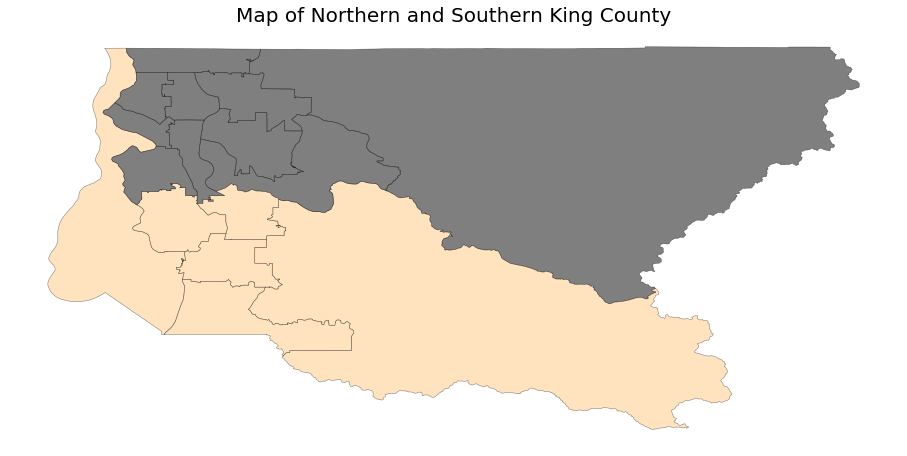

In [27]:
# Mapping North and South King County by PUMA ID
fig,ax = plt.subplots(1, figsize=(16,14))
ax =kcs_puma.plot(ax=ax, column='is_south', cmap='copper', alpha = .5, linewidth=.5, edgecolor='black',  legend = False)
ax.set_title('Map of Northern and Southern King County', size=20)
ax.set_axis_off()
plt.show()

### Now, over the same shape file, we can create a choropleth map of Opportunity Youth in South King County

In [28]:
# We start by importing the OY figures by PUMA ID
puma_oy = pd.read_excel('/Users/marwankalo/Documents/Data_Science/Project_Mod_1/opportunity_youth/data/processed/PUMA_OY_Numbers.xlsx')
puma_oy

,PumaID,OY Count
0,11612,58
1,11611,71
2,11615,54
3,11614,83
4,11613,76
5,11610,50


In [29]:
# Converting the index to the ID
puma_oy.set_index('PumaID', inplace=True)

In [30]:
puma_oy

,OY Count
PumaID,
11612,58
11611,71
11615,54
11614,83
11613,76
11610,50


In [31]:
# Here we isolate the data by the PUMA IDs we want (those of South King County)
puma_south = kcs_puma[kcs_puma['is_south'] == 1]
# Adding a new column for the OY_Count we will match in the next step
puma_south.insert(12, 'OY_Count', 'ANY') 
puma_south

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,is_south,OY_Count
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",1,ANY
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",1,ANY
41,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2...",1,ANY
42,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2...",1,ANY
44,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3...",1,ANY
52,53,11610,5311610,"King County (Central)--Renton City, Fairwood, ...",G6120,S,75931302,4694856,+47.4836108,-122.1904418,"POLYGON ((-122.18399 47.51673, -122.18361 47.5...",1,ANY


In [32]:
# Here we match the PUMA IDs and add Opportunity Youth counts to the OY_Count column
puma_south['OY_Count'] = puma_south.PUMACE10.apply(lambda x: puma_oy.loc[x].values[0])
puma_south.head()

/Users/marwankalo/opt/anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,is_south,OY_Count
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",1,58
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",1,71
41,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2...",1,54
42,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2...",1,83
44,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3...",1,76


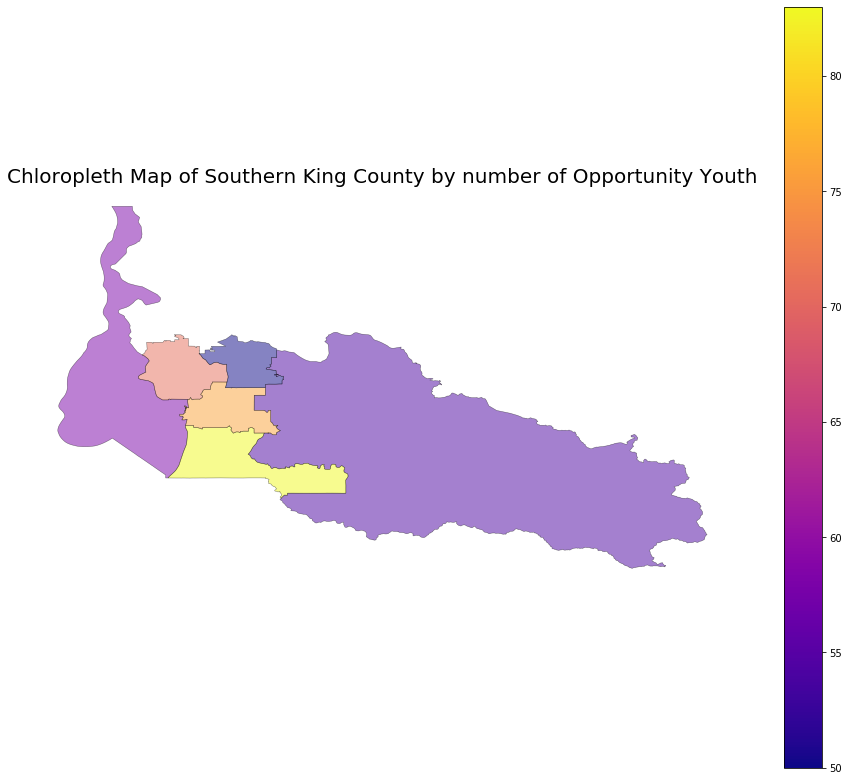

In [33]:
# Here we plot a choropleth map showing the level of Opportunity Youth by PUMA in South King County
fig,ax = plt.subplots(1, figsize=(16,14))
ax =puma_south.plot(ax=ax, column='OY_Count', cmap='plasma', alpha = .5, linewidth=.5, edgecolor='black',  legend = True)
ax.set_title('Chloropleth Map of Southern King County by number of Opportunity Youth', size=20)
ax.set_axis_off()
plt.show()